# Using OpenCV to detect circles

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm as skl_svm
import sklearn.cross_validation as skl_cv
import seaborn as sns
import os
import sys
import cv2

base_path = '/home/lundi/Python/MNIST/'
sys.path.append(base_path + '/libraries/')

import MNIST_data_processor as mdp

MNIST_data_processor = mdp.MNIST_data_processor()

from matplotlib.patches import Ellipse

In [31]:
def convert_to_img(index):
    img = np.zeros((28, 28,3))
    img[:,:,0] = X.ix[index].reshape(28,28)
    img[:,:,1] = X.ix[index].reshape(28,28)
    img[:,:,2] = X.ix[index].reshape(28,28)
    
    return img

In [62]:
X, y = MNIST_data_processor.load_subset_data()

[[[ 13.5         13.5          5.14781523]]]


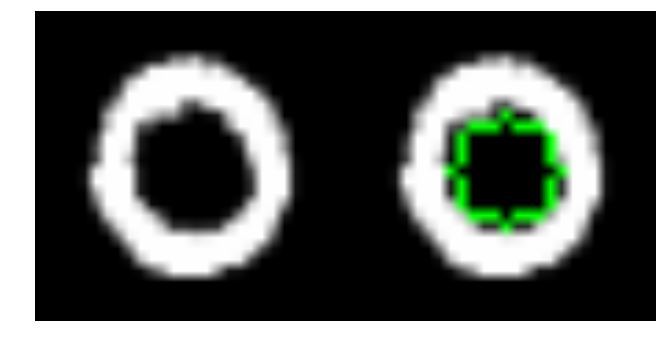

In [61]:
image = convert_to_img(1)
image = image.astype('uint8')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
output = image.copy()
circles = cv2.HoughCircles(gray, cv2.cv.CV_HOUGH_GRADIENT,dp = 1, minDist = 3,
                            param1=50,param2=10,minRadius=0,maxRadius=0)
print circles
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x_circle, y_circle, r_circle) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circles
        cv2.circle(output, (x_circle, y_circle), r_circle, (0, 255, 0), 1)
 
    # show the output image
    plt.imshow(np.hstack([image, output]))
    plt.axis('off');

This works, let's loop through all zeros to make sure it's working

In [158]:
zero_indexes = ( y == 6 )
X_zeros = X.loc[zero_indexes].head(10)

xy (15.5, 16.0)
area: 48.8370178166
xy (16.299922943115234, 12.13157844543457)
area: 343.06437414

xy (15.644526481628418, 11.233636856079102)
area: 387.203571462

xy (13.398561477661133, 17.97338104248047)
area: 71.5354317653
xy (15.215781211853027, 12.114120483398438)
area: 332.296180502

xy (17.73113441467285, 17.20856475830078)
area: 34.7079286917
xy (16.02639389038086, 12.172978401184082)
area: 759.019698606

xy (17.39994239807129, 15.344635963439941)
area: 39.0350450921
xy (14.576234817504883, 12.090415954589844)
area: 872.877492127



error: /home/lundi/Downloads/opencv-2.4.13/modules/imgproc/src/shapedescr.cpp:799: error: (-201) Number of points should be >= 5 in function cvFitEllipse2


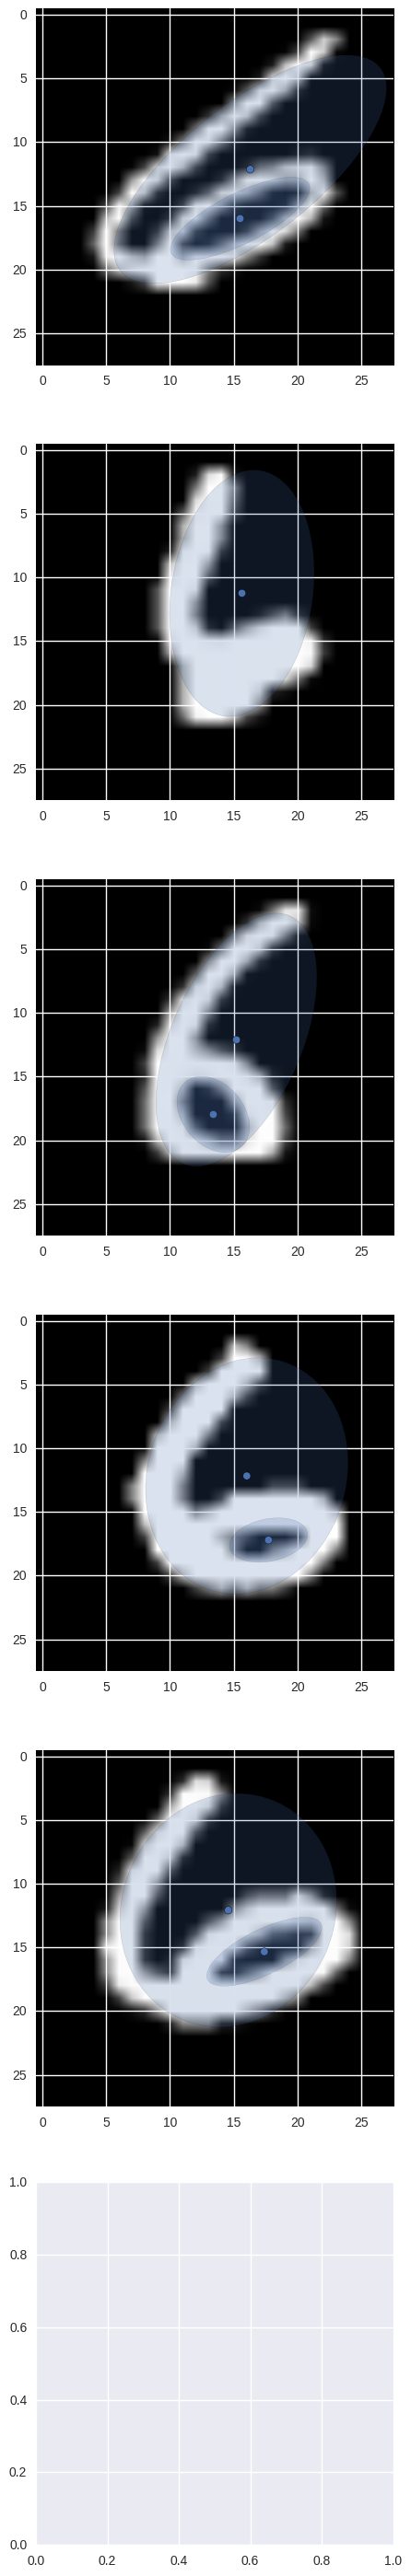

In [170]:
plt.figure(figsize=(5, 6 * X_zeros.shape[0]))

for index, current_zero_index in enumerate(X_zeros.index):
    image = convert_to_img(current_zero_index)
    image = image.astype('uint8')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    output = image.copy()

    plt.subplot(X_zeros.shape[0], 1, (index+1))
    # ensure at least some circles were found
    '''if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # loop over the (x, y) coordinates and radius of the circles
        for (x_circle, y_circle, r_circle) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circles
            cv2.circle(output, (x_circle, y_circle), r_circle, (0, 255, 0), 1)

        # show the output image
        plt.imshow(np.hstack([image, output]))
        plt.axis('off');
    else:'''
    ret,thresh = cv2.threshold(gray,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2)

    for cnt in contours:
        ellipse = cv2.fitEllipse(cnt)
        print 'xy', ellipse[0]
        print 'area:', ellipse[1][0] * ellipse[1][0] * np.pi
        #cv2.ellipse(image,ellipse,(0,255,0),2)
        ellipse_matplot = Ellipse(xy=ellipse[0], width=ellipse[1][0], height=ellipse[1][1], angle=ellipse[2])
        ax = plt.gca()
        ax.add_artist(ellipse_matplot)
        ellipse_matplot.set_clip_box(ax.bbox)
        ellipse_matplot.set_alpha(0.2)
        
        ellipse_matplot = Ellipse(xy=ellipse[0], width=0.6, height=0.6, angle=0)
        ax.add_artist(ellipse_matplot)
        ellipse_matplot.set_clip_box(ax.bbox)
        
        
    plt.imshow(image)
    print 